In [1]:
import yaml
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
with open('config.yml', 'r') as file:
    config = yaml.safe_load(file)

# MetaData

In [2]:
from EDA import Meta_Data

meta_data = Meta_Data()

Loading metadata
Adding totals for subjects


100%|██████████| 173/173 [00:53<00:00,  3.25it/s]


In [3]:
meta_data.sample_submission

Id  StartHesitation  Turn  Walking
0            003f117e14_0                0     0        0
1            003f117e14_1                0     0        0
2            003f117e14_2                0     0        0
3            003f117e14_3                0     0        0
4            003f117e14_4                0     0        0
...                   ...              ...   ...      ...
286365  02ab235146_281683                0     0        0
286366  02ab235146_281684                0     0        0
286367  02ab235146_281685                0     0        0
286368  02ab235146_281686                0     0        0
286369  02ab235146_281687                0     0        0

[286370 rows x 4 columns]

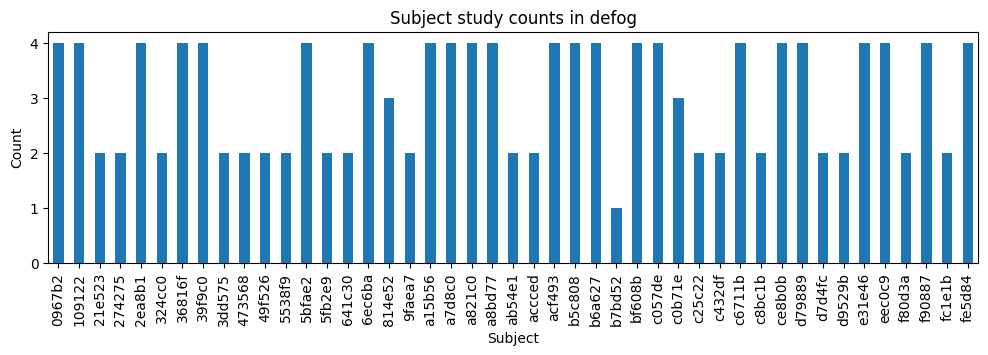

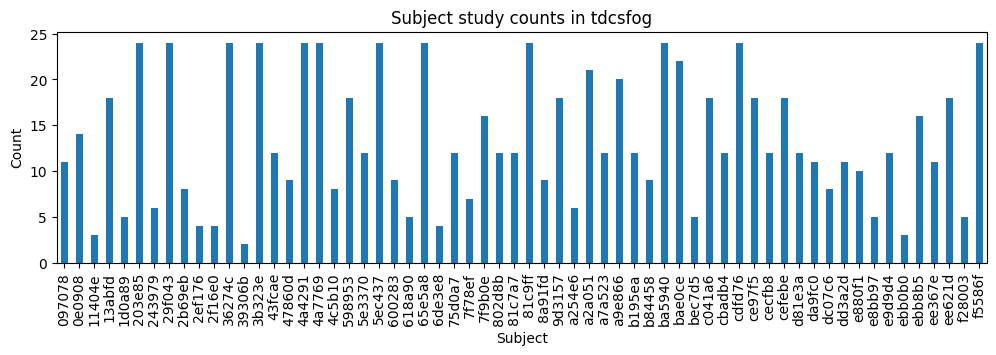

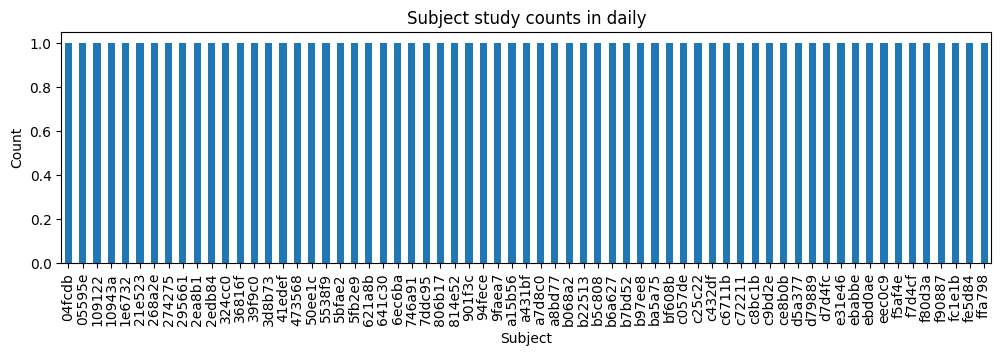

In [4]:
plt.figure(figsize=(12,3))
plt.title(f'Subject study counts in defog')
meta_data.defog.groupby('Subject').count().sort_values('Subject').Id.plot.bar()
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12,3))
plt.title(f'Subject study counts in tdcsfog')
meta_data.tdcsfog.groupby('Subject').count().sort_values('Subject').Id.plot.bar()
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12,3))
plt.title(f'Subject study counts in daily')
meta_data.daily.groupby('Subject').count().sort_values('Subject').Id.plot.bar()
plt.ylabel('Count')
plt.show()

# Analysing Subjects

## Plotting Subject Information

In [5]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.title('Subject Descriptions')
sns.boxplot(meta_data.subjects[['Age', 'YearsSinceDx', 'UPDRSIII_On', 'UPDRSIII_Off', 'NFOGQ']])

plt.subplot(1,2,2)
plt.title('Target Distributions')
sns.boxplot(meta_data.subjects[['StartHesitation_Total', 'Turn_Total', 'Walking_Total']])

plt.show()

In [5]:
meta_data.subjects.sort_values('StartHesitation_Total', ascending=False)

Subject  Visit  Age Sex  YearsSinceDx  UPDRSIII_On  UPDRSIII_Off  NFOGQ  \
92   a9e866    NaN   74   M           4.0         46.0          44.0     25   
9    11404e    NaN   67   F           4.0          NaN          18.0     29   
75   8a91fd    NaN   73   M           7.0         37.0          46.0     20   
149  e880f1    NaN   82   F          15.0         54.0          68.0     21   
130  cbadb4    NaN   68   F          12.0         22.0          39.0     22   
..      ...    ...  ...  ..           ...          ...           ...    ...   
64   746a91    1.0   63   M           4.0         25.0           NaN      0   
66   7ddc95    1.0   83   M           5.0         44.0           NaN      0   
67   7f78ef    NaN   77   M           4.0         41.0          44.0     20   
68   7f9b0e    NaN   75   M           9.0         43.0          46.0     20   
172  ffa798    1.0   55   F           9.0         14.0           NaN      0   

     StartHesitation_Total  Turn_Total  Walking_Total  
92                  237601      611441         140173  
9                    20299      155055              0  
75                   12647      130196          27761  
149                  10476       52574            276  
130                   7865        4305          11842  
..                     ...         ...            ...  
64                       0           0              0  
66                       0           0              0  
67                       0           0              0  
68                       0           0              0  
172                      0           0              0  

[173 rows x 11 columns]

## Plotting Subject Velocity Data

In [6]:
from EDA import plot_subject_velocity_data

subject e880f1 has 10 entries


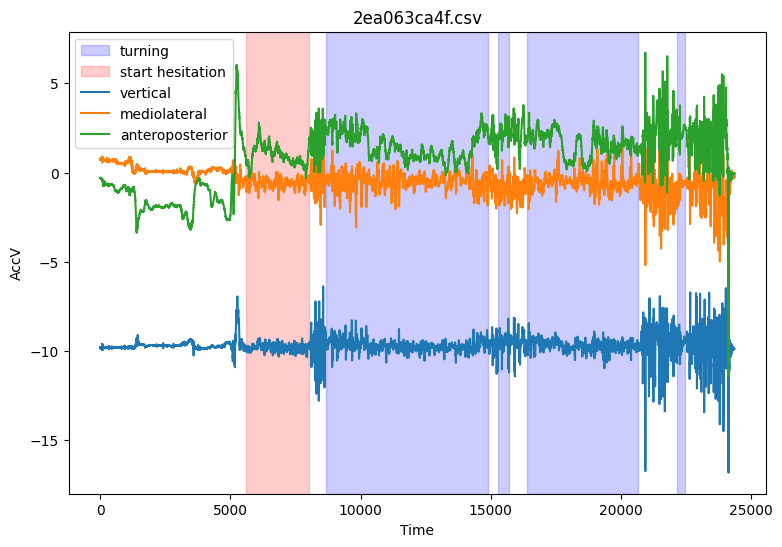

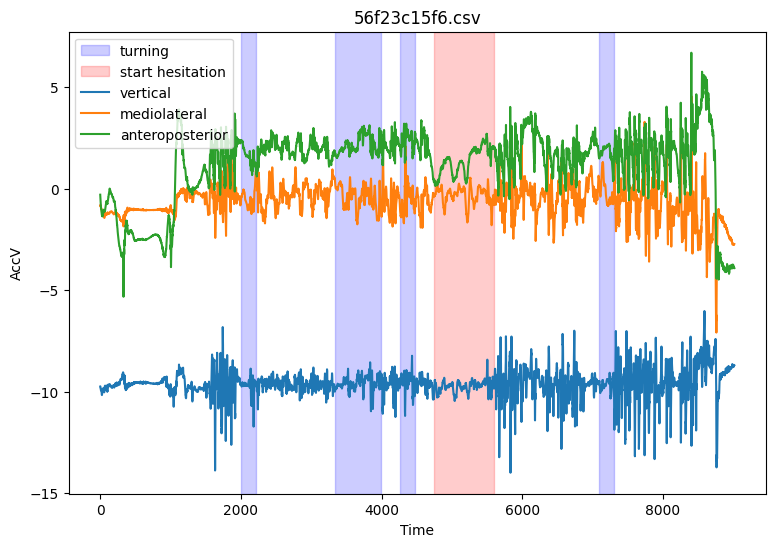

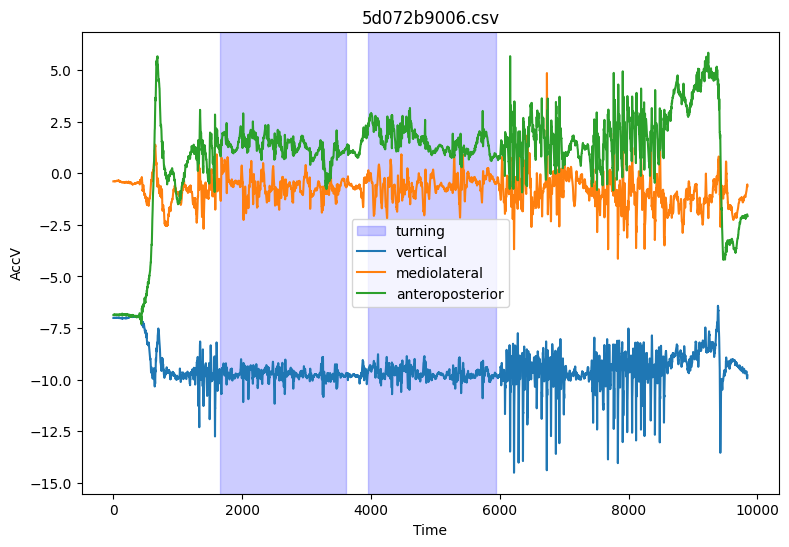

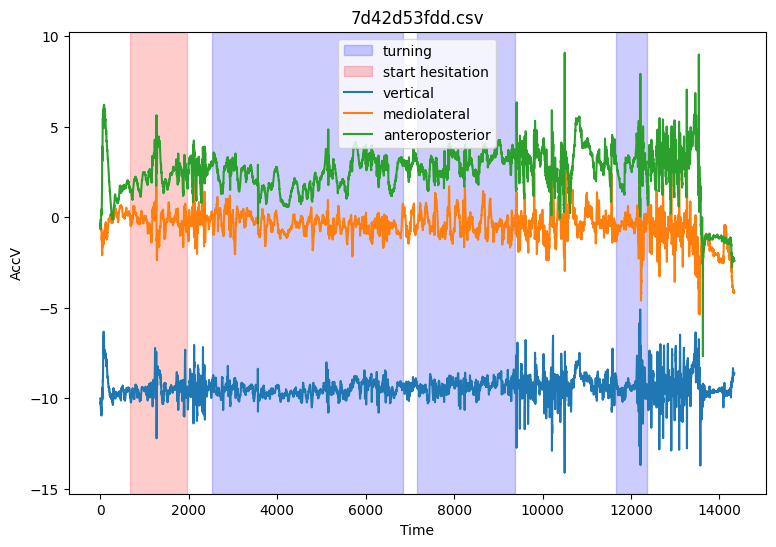

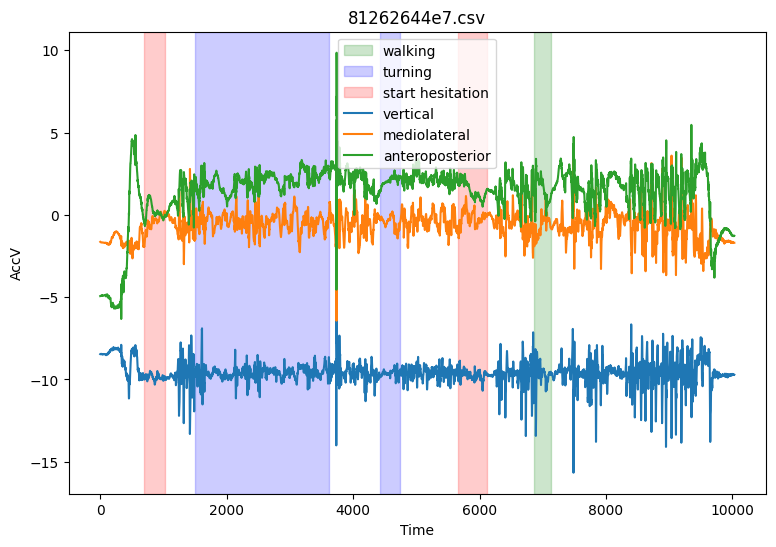

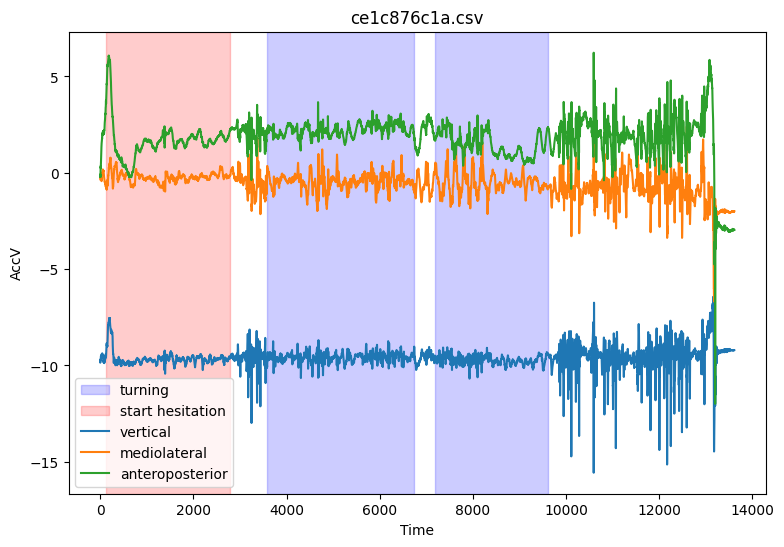

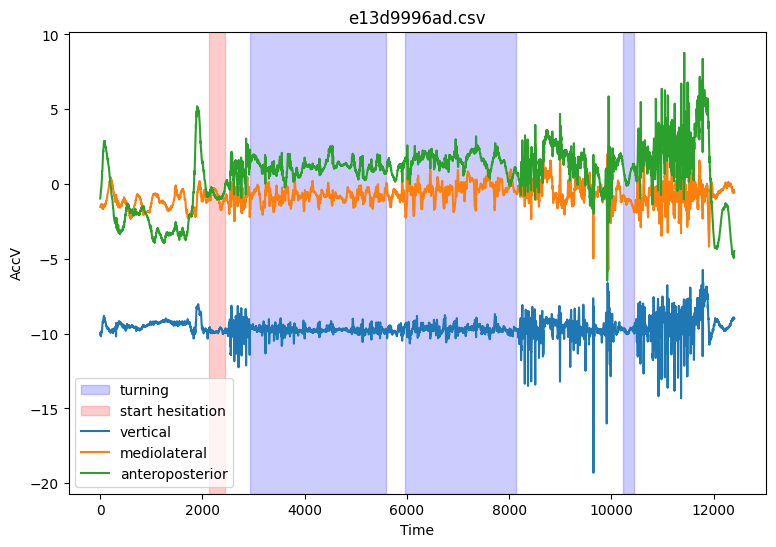

In [7]:
subject = 'e880f1'

plot_subject_velocity_data(subject, meta_data)

# Velocity Data

In [7]:
from EDA import plot_velocity_data

### Confirming StartHesitation Turn and Walking are mutally exclusive

In [18]:
m = 0
for folder in ['tdcsfog/', 'defog/']:
    print(folder)
    path = config['data_path'] + 'train/' + folder
    files = os.listdir(path)

    for name in files:
        file_path = os.path.join(path, name)
        df = pd.read_csv(file_path)
        m = max(m, df[['StartHesitation', 'Turn', 'Walking']].sum(axis=1).max())
    
    
print(m)

tdcsfog/
defog/
1


### DEFOG

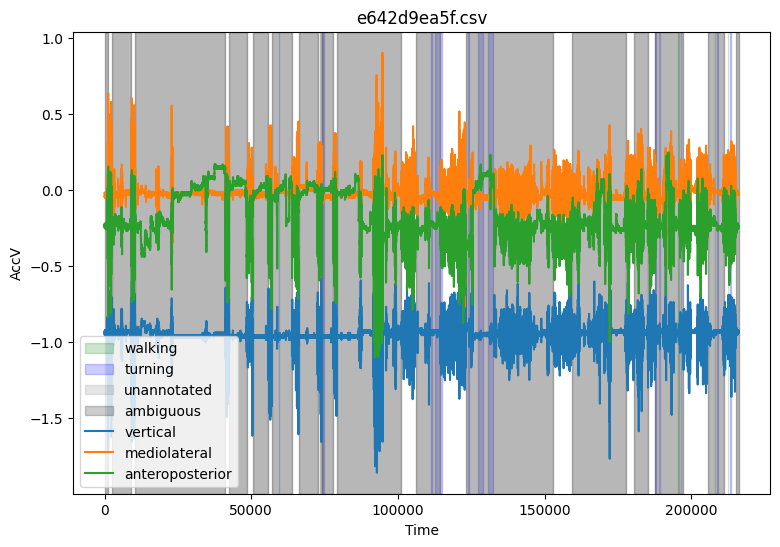

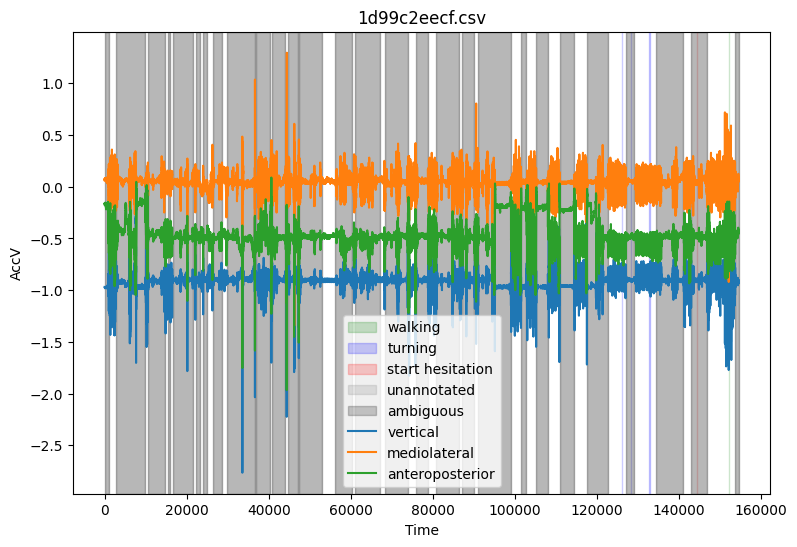

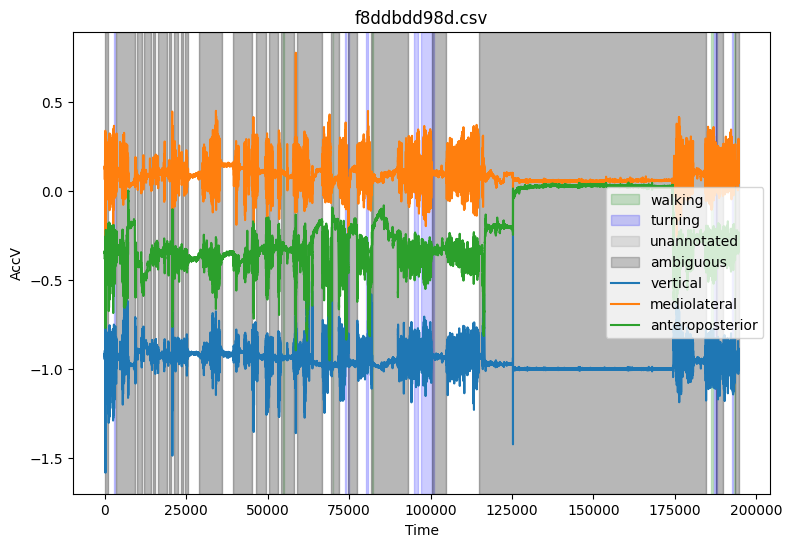

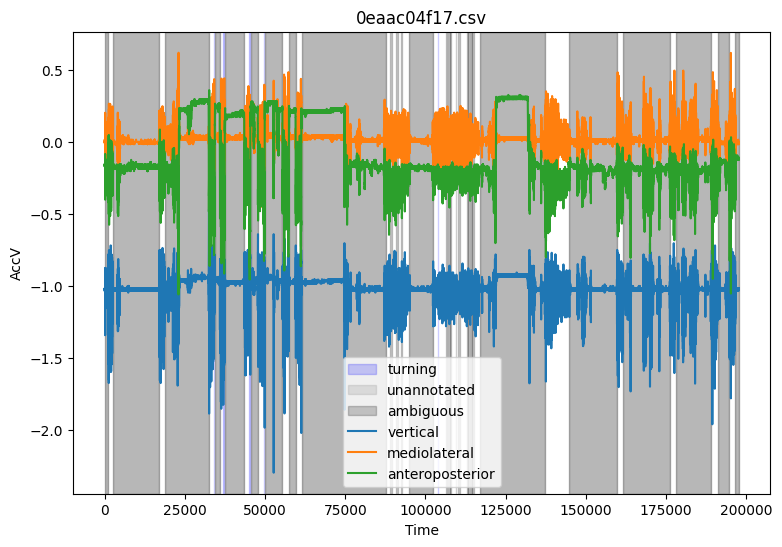

In [11]:
path = config['data_path'] + 'train/' + 'defog/'
files = os.listdir(path)

for name in files[:10]:
    file_path = os.path.join(path, name)
    plot_velocity_data(file_path)

### TDCSFOG

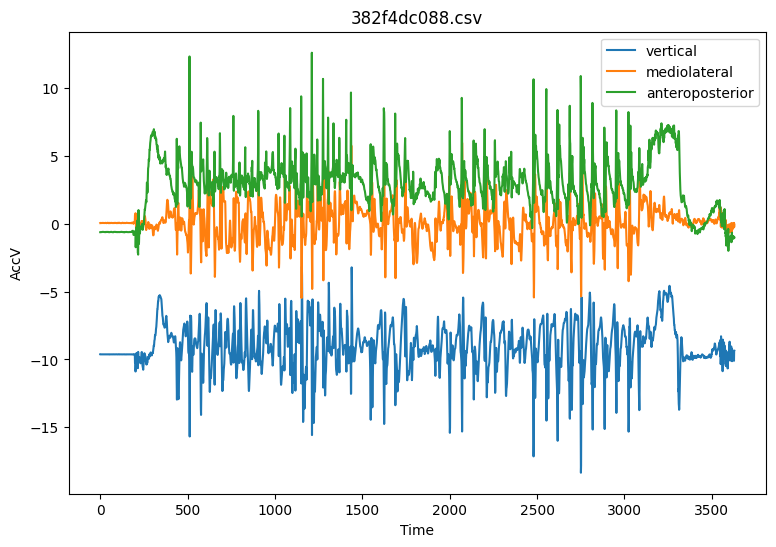

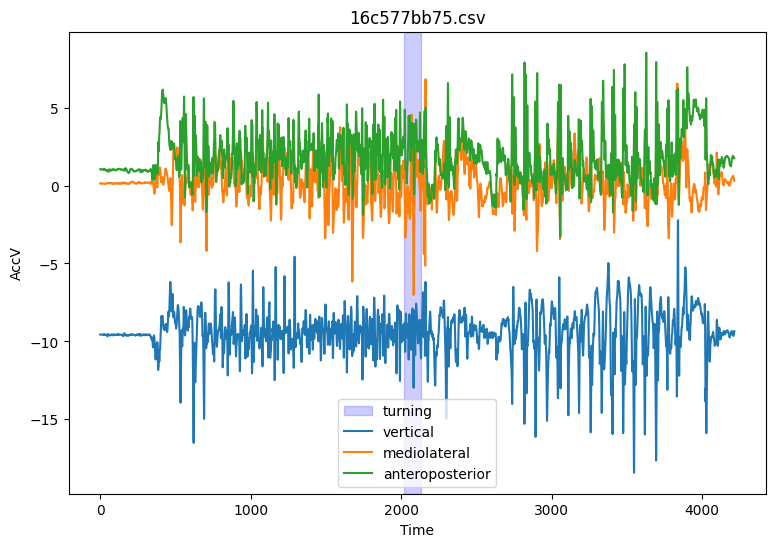

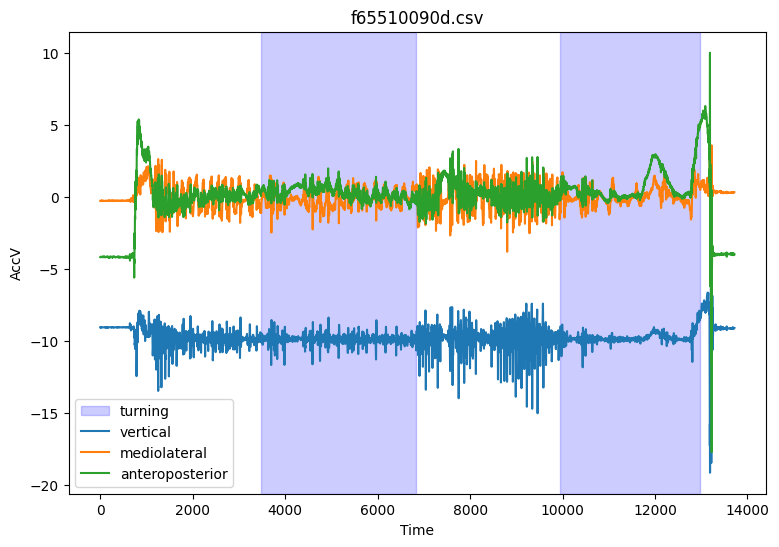

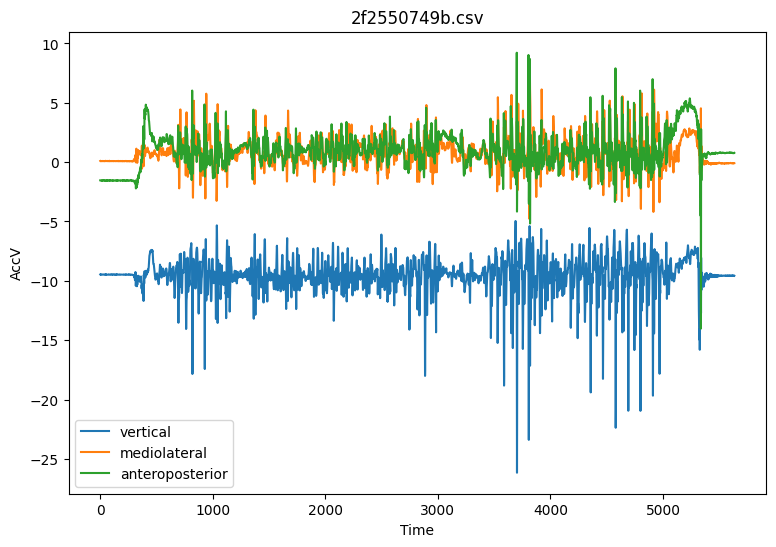

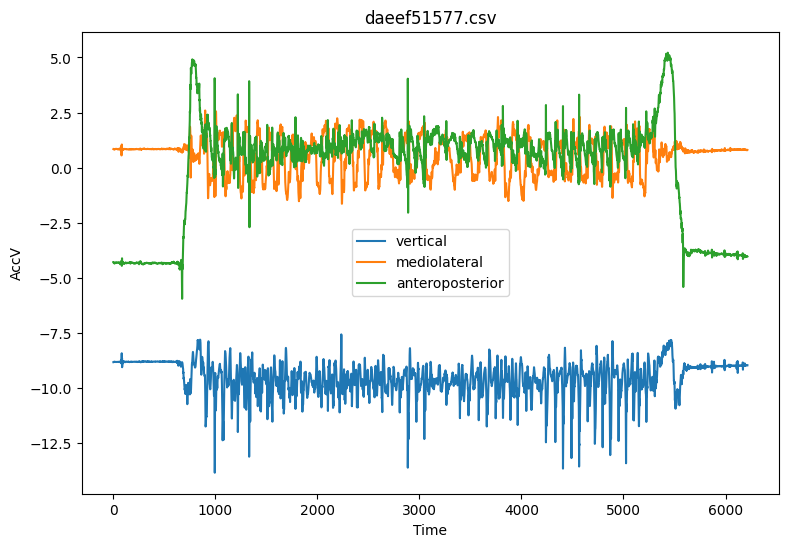

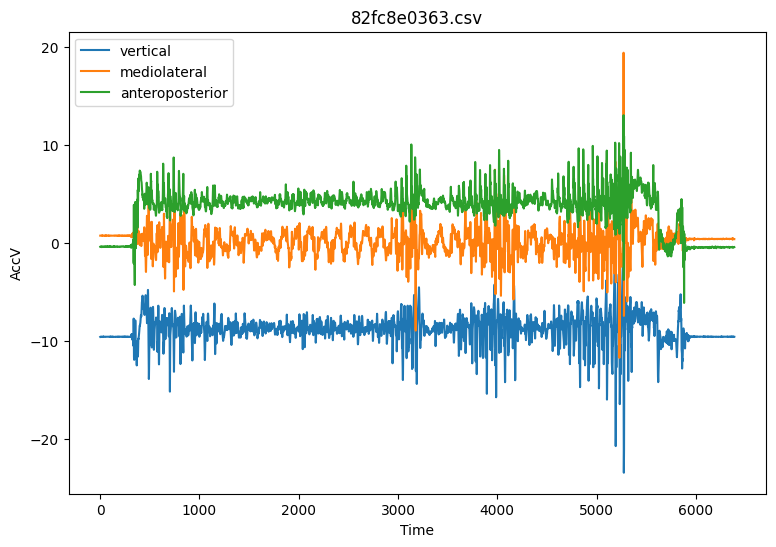

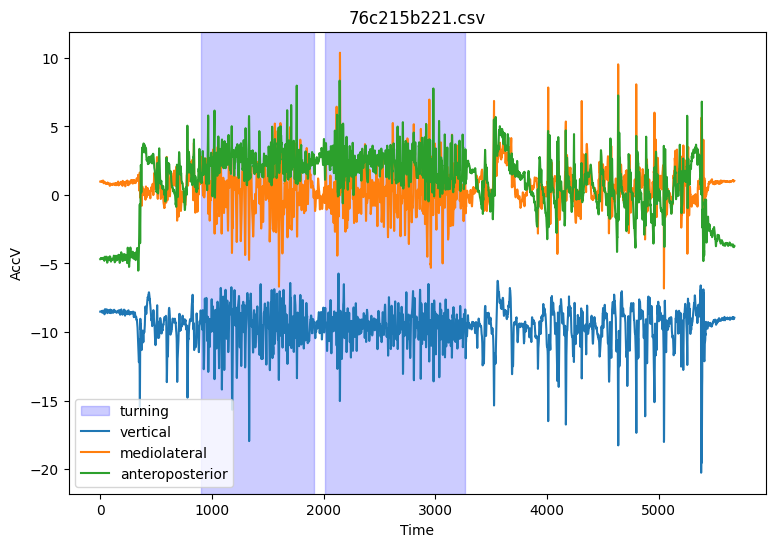

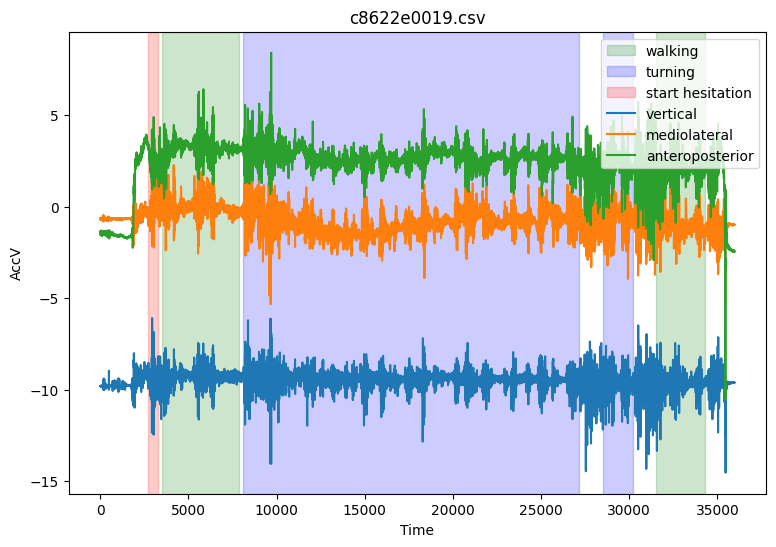

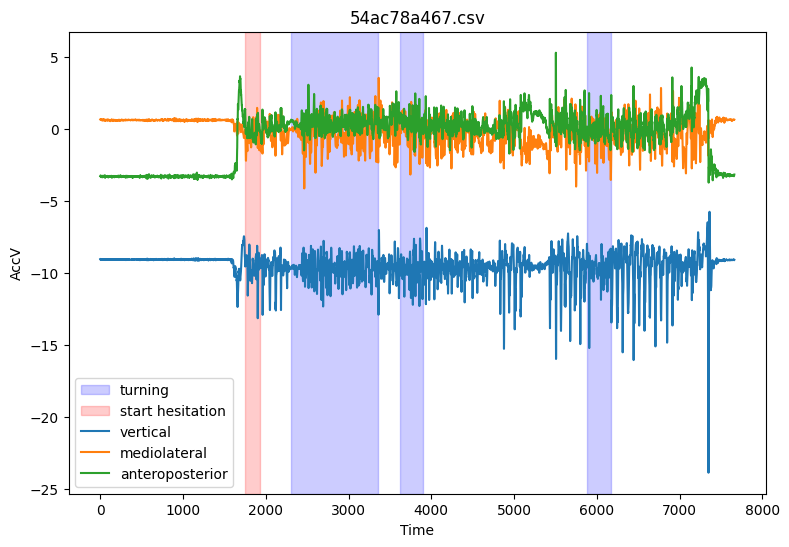

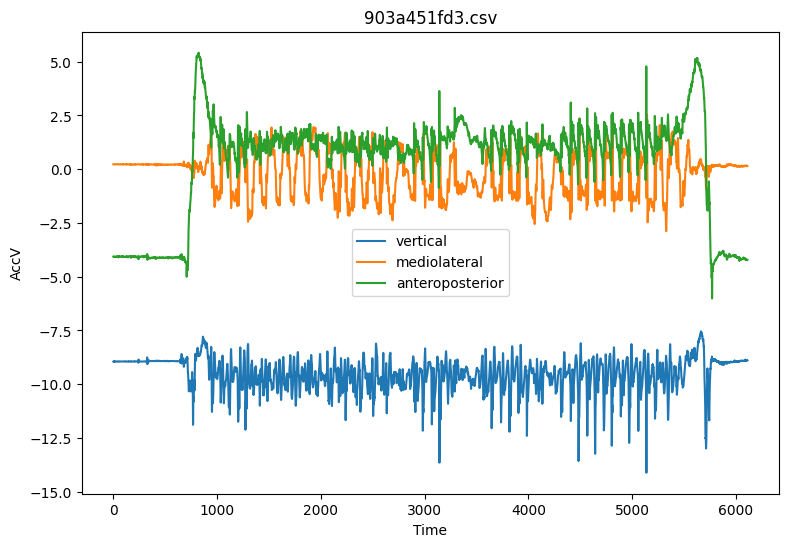

In [10]:
path = config['data_path'] + 'train/' + 'tdcsfog/'
files = os.listdir(path)

for name in files[:10]:
    file_path = os.path.join(path, name)
    plot_velocity_data(file_path)

### Test Data

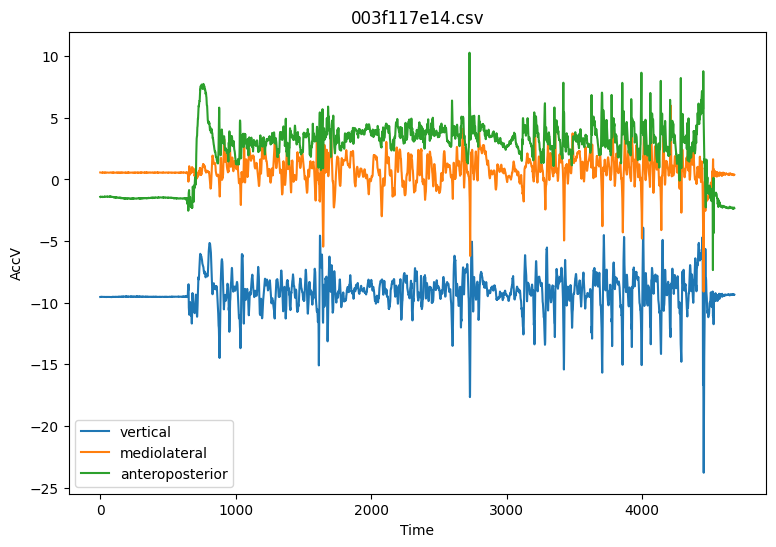

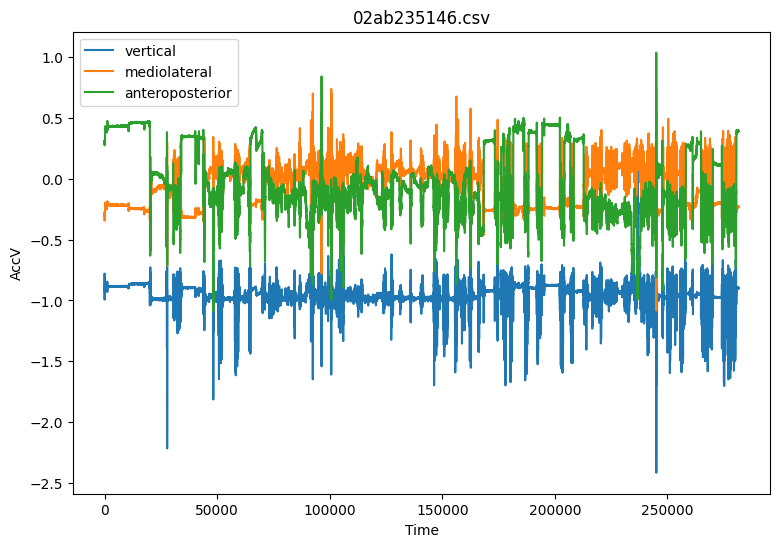

In [9]:
path = config['data_path'] + 'test/' + 'tdcsfog/'
name = os.listdir(path)[0]

file_path = os.path.join(path, name)
plot_velocity_data(file_path)

path = config['data_path'] + 'test/' + 'defog/'
name = os.listdir(path)[0]

file_path = os.path.join(path, name)
plot_velocity_data(file_path)

### notype

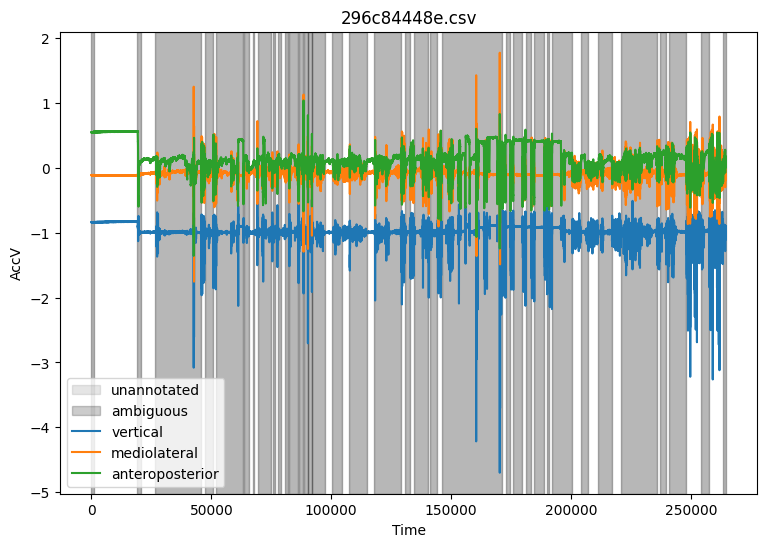

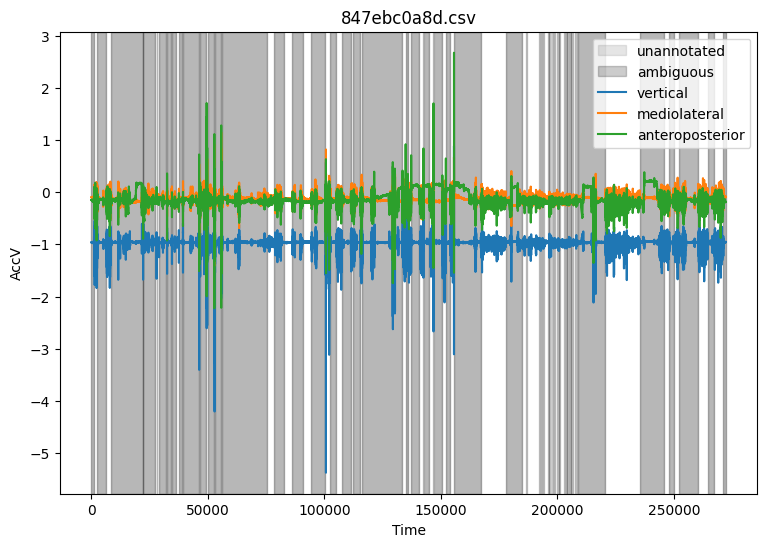

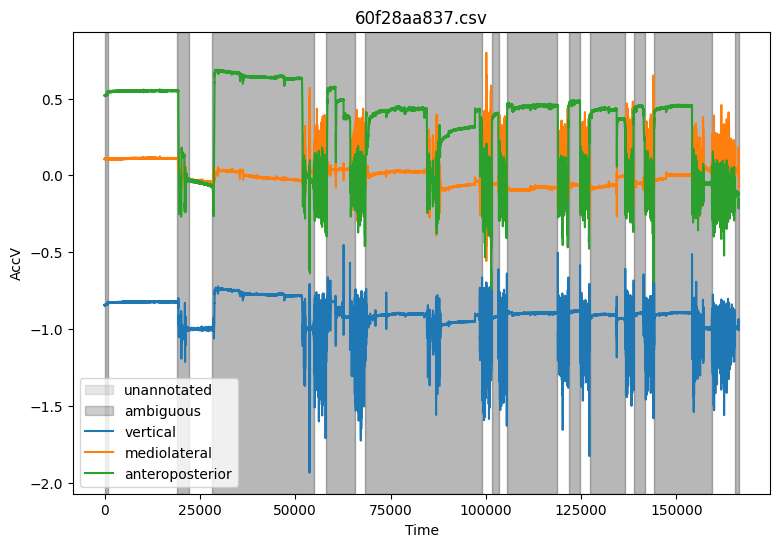

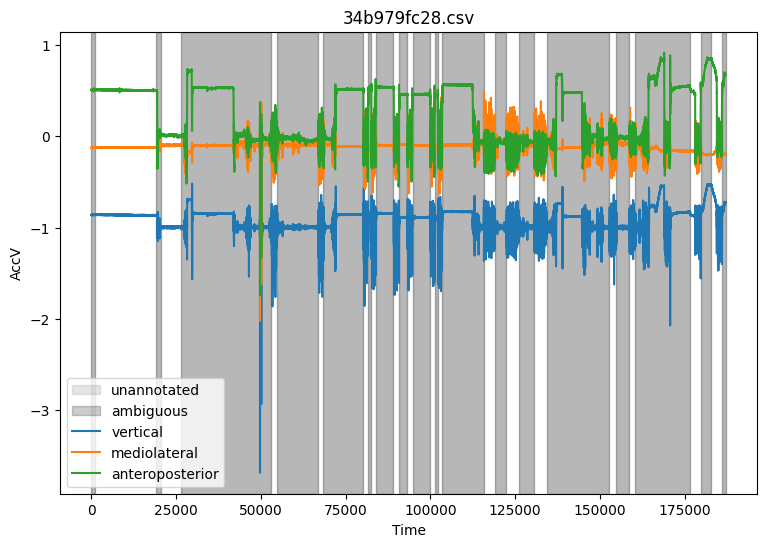

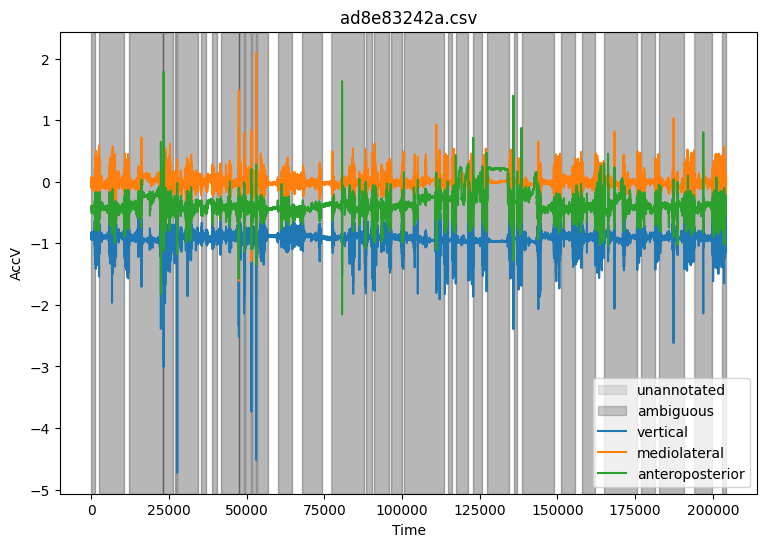

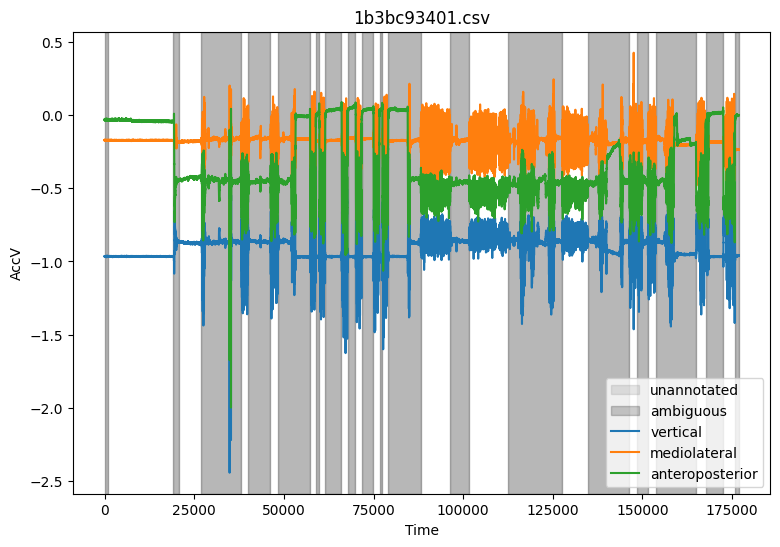

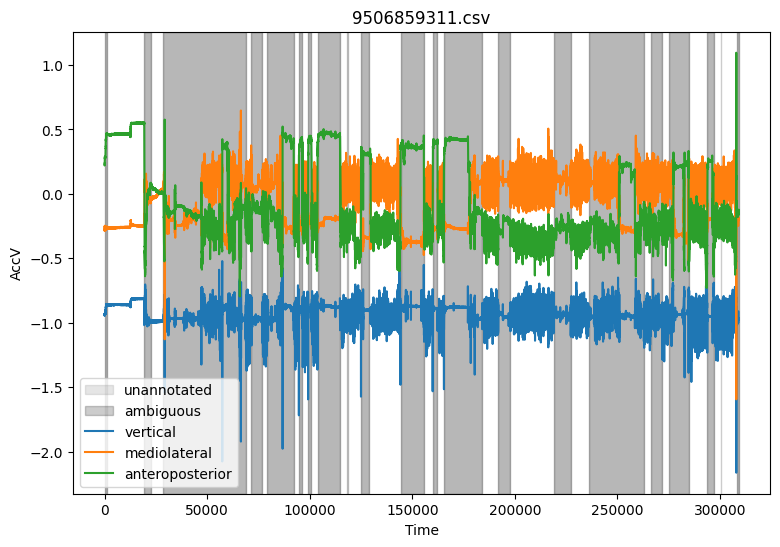

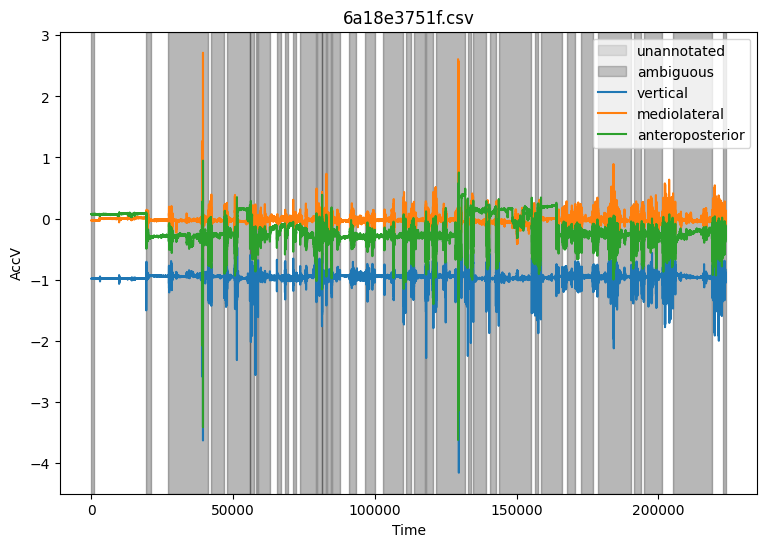

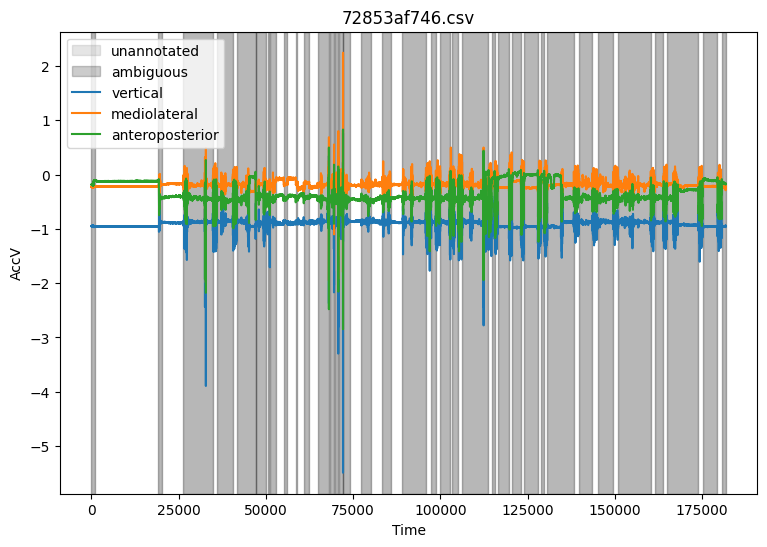

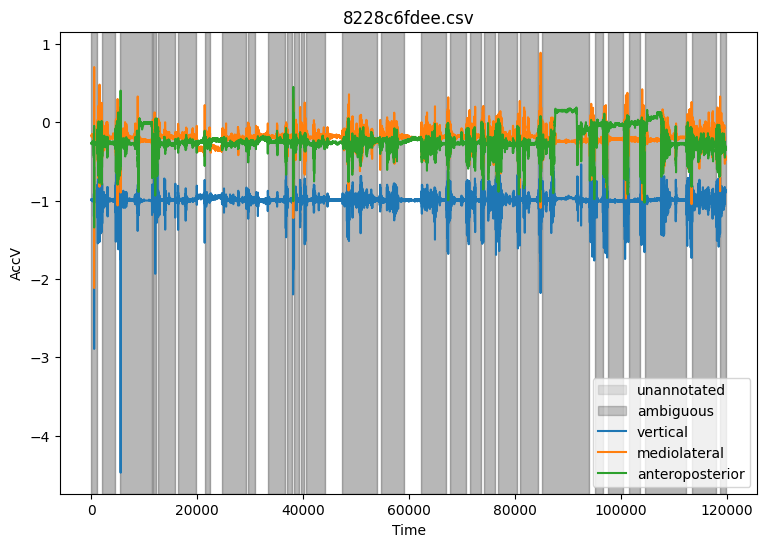

In [12]:
path = config['data_path'] + 'train/' + 'notype/'
files = os.listdir(path)

for name in files[:10]:
    file_path = os.path.join(path, name)
    plot_velocity_data(file_path)

# Aggregate Statistics (EXPERIMENTAL)

In [1]:
from EDA import generate_aggregate_statistics

In [2]:
df_agg = generate_aggregate_statistics()

scanning defog
scanning tdcsfog
scanning notype


In [3]:
df_agg

file_name  AccV_mean  AccML_mean  AccAP_mean  AccV_std  AccML_std  \
0   961b782275.csv  -0.939428   -0.018315   -0.156548  0.074484   0.080683   
0   139f60d29b.csv  -0.910362    0.015316    0.246506  0.138594   0.064034   
0   f9efef91fb.csv  -0.987690   -0.063905   -0.032725  0.054635   0.061024   
0   8d2d863dfd.csv  -0.928878    0.034984    0.156366  0.069079   0.068653   
0   6041cad8ec.csv  -0.928935   -0.128044   -0.207771  0.069431   0.049584   
..             ...        ...         ...         ...       ...        ...   
0   3f02fa6e40.csv  -0.935630   -0.123579   -0.287595  0.081274   0.086807   
0   71dd8ce20d.csv  -0.957560   -0.087820    0.189454  0.089807   0.064406   
0   2054f1d5df.csv  -0.908499   -0.088595   -0.096168  0.053811   0.094600   
0   434732a5e3.csv  -0.874972   -0.035055   -0.427373  0.059685   0.055935   
0   affdf8553f.csv  -0.953502   -0.072706    0.225487  0.083243   0.072699   

    AccAP_std   count  StartHesitation_percentage  Turn_percentage  \
0    0.135559  253385                         0.0         0.009164   
0    0.326299   93762                         0.0         0.009023   
0    0.106699  123972                         0.0         0.048172   
0    0.219796  158932                         0.0         0.025501   
0    0.269112  192308                         0.0         0.138798   
..        ...     ...                         ...              ...   
0    0.125472  210568                         NaN              NaN   
0    0.214284  196120                         NaN              NaN   
0    0.339363  244020                         NaN              NaN   
0    0.132617  443496                         NaN              NaN   
0    0.150662  245616                         NaN              NaN   

    Walking_percentage  Valid_percentage  Task_percentage  
0             0.000000          0.194834         0.194921  
0             0.000448          0.272797         0.272840  
0             0.005138          0.289928         0.290017  
0             0.033499          0.460272         0.462777  
0             0.001929          0.426275         0.426306  
..                 ...               ...              ...  
0                  NaN          0.328787         0.328920  
0                  NaN          0.342566         0.342632  
0                  NaN          0.493103         0.493156  
0                  NaN          0.387850         0.390337  
0                  NaN          0.300636         0.300770  

[970 rows x 13 columns]

In [7]:
df_agg.Walking_percentage.mean()
df_agg.Valid_percentage.mean()
df_agg.Task_percentage.mean()

0.007641453902455489

In [12]:
sample_submission['StartHesitation'] = df_agg.StartHesitation_percentage.mean()
sample_submission['Turn'] = df_agg.Turn_percentage.mean()
sample_submission['Walking'] = df_agg.Walking_percentage.mean()

In [15]:
sample_submission

Id  StartHesitation      Turn   Walking
0            003f117e14_0         0.009295  0.108751  0.007641
1            003f117e14_1         0.009295  0.108751  0.007641
2            003f117e14_2         0.009295  0.108751  0.007641
3            003f117e14_3         0.009295  0.108751  0.007641
4            003f117e14_4         0.009295  0.108751  0.007641
...                   ...              ...       ...       ...
286365  02ab235146_281683         0.009295  0.108751  0.007641
286366  02ab235146_281684         0.009295  0.108751  0.007641
286367  02ab235146_281685         0.009295  0.108751  0.007641
286368  02ab235146_281686         0.009295  0.108751  0.007641
286369  02ab235146_281687         0.009295  0.108751  0.007641

[286370 rows x 4 columns]

In [14]:
sample_submission.to_csv('./submissions/percentage_averages.csv', index=False)

# Unlabeled Data (EXPERIMENTAL)

In [1]:
from EDA import plot_velocity_data

In [4]:
path = os.path.join(config['data_path'], 'unlabeled')
name = os.listdir(path)[0]
file_path = os.path.join(path, name)

In [ ]:
plot_velocity_data(file_path)